# Programación declarativa @ URJC
# Programación funcional
## Curso 23-24, convocatoria ordinaria (30 de octubre de 2023)
## Campus de Móstoles


# Preámbulo

In [ ]:
import $ivy.`org.scalatest::scalatest:3.0.8`
import org.scalatest._

### Algunas definiciones de tipos y funciones auxiliares

In [ ]:
sealed abstract class Tree[A]
case class Empty[A]() extends Tree[A]
case class Node[A](left: Tree[A], root: A, right: Tree[A]) extends Tree[A]

object Tree{
    def void[A]: Tree[A] = Empty()
    def leaf[A](a: A): Node[A] = Node(Empty(), a, Empty())
    def right[A](a: A, tree: Tree[A]): Node[A] = Node(Empty(), a, tree)
    def left[A](tree: Tree[A], a: A): Node[A] = Node(tree, a, Empty())
    def node[A](left: Tree[A], a: A, right: Tree[A]): Node[A] = Node(left, a, right)
}

import Tree._

def foldTree[A, B](tree: Tree[A])(empty: B)(node: (B, A, B) => B): B = 
    tree match {
        case Empty() => empty
        case Node(left, root, right) => node(foldTree(left)(empty)(node), root, foldTree(right)(empty)(node))
    }

In [ ]:
object Signatures{
    abstract class List[A]{
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def exists(pred: A => Boolean): Boolean
 
        // Returns the number of elements of this list
        def length: Int
        def reverse: List[A]
    }
}

### Definiciones auxiliares sobre la correspondencia Curry-Howard y Tipos Algebraicos de Datos

In [ ]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    def law1(a: A): Boolean = 
        to(from(a)) == a
    
    def law2(b: B): Boolean = 
        from(to(b)) == b
}

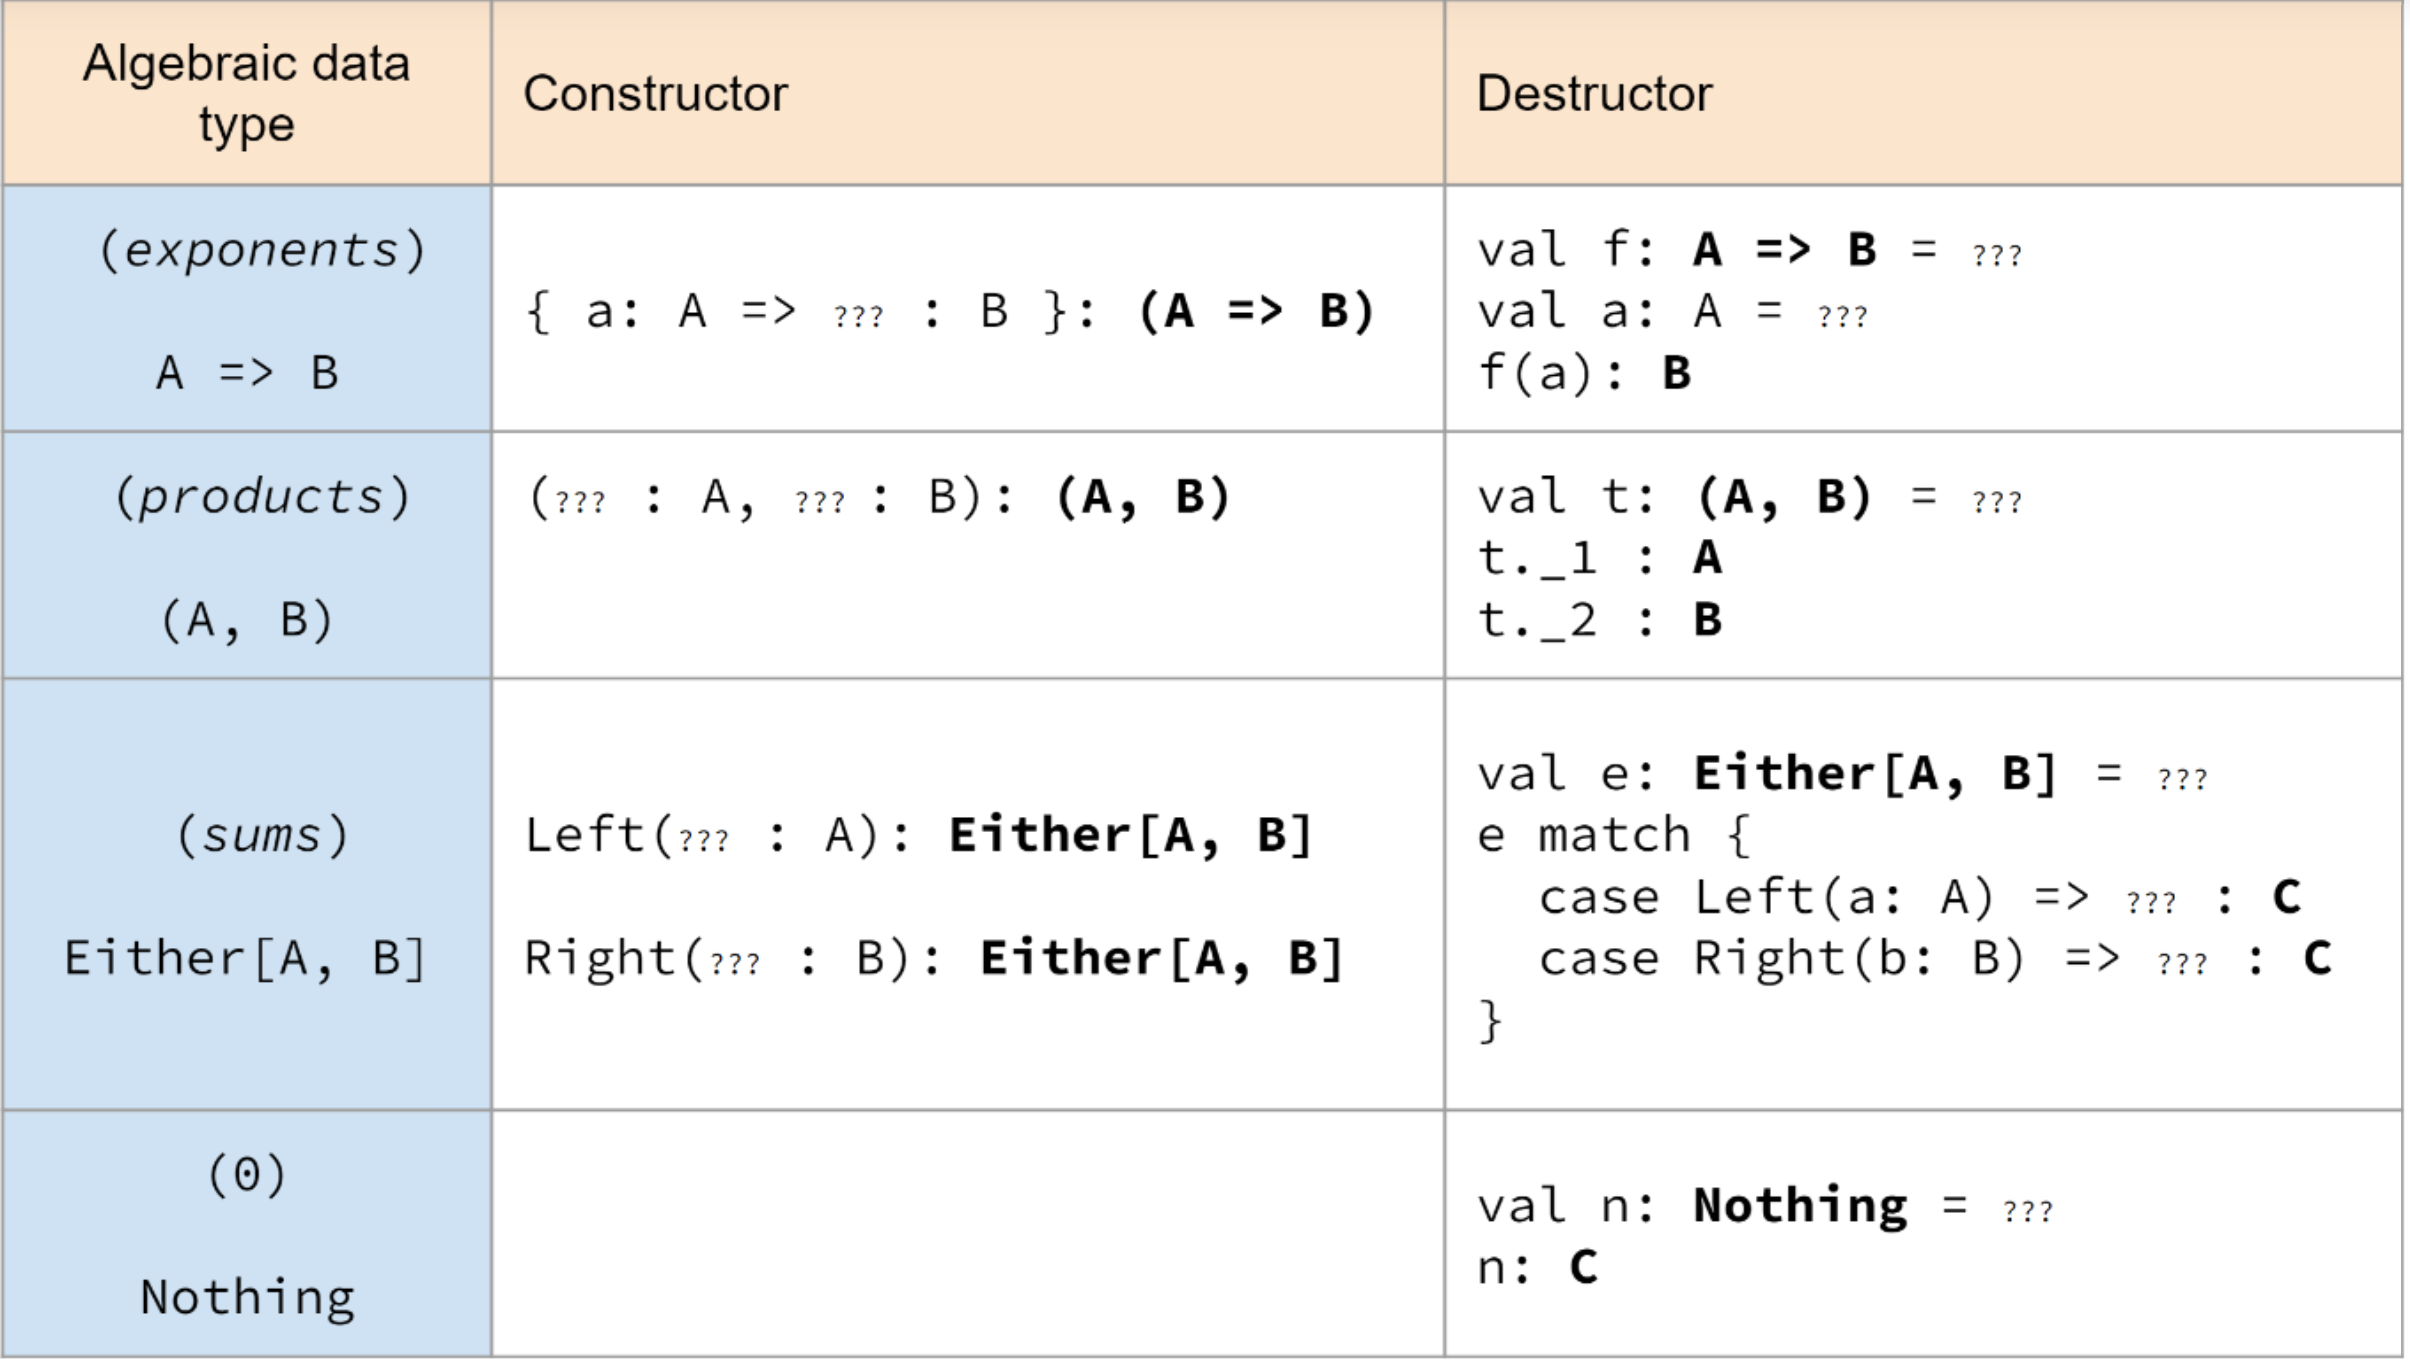

In [ ]:
type Not[P] = P => Nothing

# Ejercicio 1
__(2 puntos)__

__a) (1 punto)__ Utiliza la correspondencia de Curry-Howard para demostrar la validez del siguiente argumento lógico: 

$ \{ r \rightarrow s, p \vee q, \neg(\neg p \rightarrow s) \} \vdash q \wedge \neg r$

In [ ]:
def proof[P, Q, R, S](p1: R => S, p2: Either[P, Q], p3: Not[Not[P] => S]): (Q, Not[R]) = 
    p2 match {
        case Left(p) => 
            p3(_(p))
        case Right(q) => 
            (q, r => p3(_ => p1(r)))
    }

__b) (1 punto)__ Utiliza la correspondencia de Curry-Howard para demostrar la siguiente tautología de la lógica clásica proposicional: $\vdash_c (\neg p \rightarrow b) \rightarrow \neg q \rightarrow a$. Para ello, utiliza como premisa adicional la ley de la doble negación aplicada a la proposición $p$, es decir, demuestra la validez intuicionista del siguiente argumento lógico:

$ \{ \neg\neg p \rightarrow p \} \vdash (\neg p \rightarrow q) \rightarrow \neg q \rightarrow p $

In [ ]:
def proof[P, Q](dn: Not[Not[P]] => P): (Not[P] => Q) => Not[Q] => P = 
    f => nq => dn(np => nq(f(np)))

# Ejercicio 2
__(1 punto)__

Dada la definición del tipo de datos `Either4` mostrada a continuación: 

In [ ]:
sealed abstract class Either4[A, B, C, D]
case class Item1[A, B, C, D](a: A) extends Either4[A, B, C, D]
case class Item2[A, B, C, D](b: B) extends Either4[A, B, C, D]
case class Item3[A, B, C, D](c: C) extends Either4[A, B, C, D]
case class Item4[A, B, C, D](d: D) extends Either4[A, B, C, D]

demuestra que, para todo tipo `A`, `B`, `C` y `D`, los tipos de datos `(Either[A, B], Either[C, D])` y `Either4[(A, C), (A, D), (B, C), (B, D)]` son isomorfos:

In [1]:
def foo(t: (Int, String)): Int = 
    val i: Int = t._1
    val s: String = t._2
    i+s.length

defined function foo

In [ ]:
def foo(t: (Int, String)): Int = 
    t match 
        case (i, s) => 
            i+s.length

In [ ]:
class Iso[A, B, C, D] extends Isomorphic[(Either[A, B], Either[C, D]), Either4[(A, C), (A, D), (B, C), (B, D)]]{

    
    def from(t: (Either[A, B], Either[C, D])): Either4[(A, C), (A, D), (B, C), (B, D)] = 
        t match 
            case (Left(a), Left(c)) => 
                Item1((a,c)) 
            case (Left(a), Right(d)) => 
                Item2((a,d))
            case (Right(b), Left(c)) => 
                Item3((b,c))
            case (Right(b), Right(d)) => 
                Item4((b,d))

    def from(t: (Either[A, B], Either[C, D])): Either4[(A, C), (A, D), (B, C), (B, D)] = 
        t match 
            case (Left(a), e2) => 
                e2 match 
                    case Left(c) => 
                        Item1((a,c)) 
                    case Right(d) => 
                        Item2((a,d))
            case (Right(b), e2) => 
                e2 match 
                    case Left(c) => 
                        Item3((b,c))
                    case Right(d) => 
                        Item4((b,d))

    

    def from(t: (Either[A, B], Either[C, D])): Either4[(A, C), (A, D), (B, C), (B, D)] = 
        t match 
            case (e1, e2) => 
                e1 match 
                    case Left(a) =>
                        e2 match 
                            case Left(c) => 
                                Item1((a,c)) 
                            case Right(d) => 
                                Item2((a,d))
                    case Right(b) => 
                        e2 match 
                            case Left(c) => 
                                Item3((b,c))
                            case Right(d) => 
                                Item4((b,d))

    
    def from(t: (Either[A, B], Either[C, D])): Either4[(A, C), (A, D), (B, C), (B, D)] = 
        val e1: Either[A, B] = t._1
        val e2: Either[C, D] = t._2
        e1 match 
            case Left(a) =>
                e2 match 
                    case Left(c) => 
                        Item1((a,c)) 
                    case Right(d) => 
                        Item2((a,d))
            case Right(b) => 
                e2 match 
                    case Left(c) => 
                        Item3((b,c))
                    case Right(d) => 
                        Item4((b,d))
    
    def from1(t: (Either[A, B], Either[C, D])): Either4[(A, C), (A, D), (B, C), (B, D)] = 
        t match {
            case (Left(a), Left(c)) => Item1((a,c))
            case (Left(a), Right(d)) => Item2((a,d))
            case (Right(b), Left(c)) => Item3((b,c))
            case (Right(b), Right(d)) => Item4((b,d))
        }
            
    def to(t: Either4[(A, C), (A, D), (B, C), (B, D)]): (Either[A, B], Either[C, D]) = 
        t match {
            case Item1((a,c)) => (Left(a), Left(c))
            case Item2((a,d)) => (Left(a), Right(d))
            case Item3((b,c)) => (Right(b), Left(c))
            case Item4((b,d)) => (Right(b), Right(d))
        }
}

La implementación deberá satisfacer las leyes de los isomorfismos, y en particular el siguiente test:

In [ ]:
class TestIso(iso: Isomorphic[(Either[Boolean, Int], Either[Char, String]), 
                              Either4[(Boolean, Char), (Boolean, String), (Int, Char), (Int, String)]]) 
extends FlatSpec with Matchers{
 
    "law1" should "hold" in {
        iso.law1((Left(true), Left('a'))) shouldBe true
        iso.law1((Left(false), Right("hi"))) shouldBe true
        iso.law1((Right(1), Left('c'))) shouldBe true
        iso.law1((Right(3), Right("bye"))) shouldBe true
    }
    
    "law2" should "hold" in {
        iso.law2(Item1((true, 'a'))) shouldBe true
        iso.law2(Item2((false, "hi"))) shouldBe true
        iso.law2(Item3((1, 'c'))) shouldBe true
        iso.law2(Item4((3, "bye"))) shouldBe true
    }
}

In [ ]:
run(new TestIso(new Iso))

# Ejercicio 3
__(4 puntos)__




Dada una lista de elementos, la función `tails` devuelve una lista formada por todas sus sublistas, incluida ella misma, en el orden que se indica en los siguientes ejemplos: 

In [ ]:
class TestTails(tails: List[Int] => List[List[Int]]) extends FlatSpec with Matchers{
    
    "tails" should "work" in {
        
        tails(Nil) shouldBe List(Nil)
        
        tails(List(1)) shouldBe
            List(
                List(1),
                Nil)
        
        tails(List(4,2,1,3)) shouldBe 
            List(
                List(4,2,1,3),
                List(2,1,3),
                List(1,3),
                List(3),
                Nil)
    }
}

__a) (1 punto)__ Implementa la función `tails` recursivamente, mediante un patrón de divide (o reduce) y vencerás.

In [ ]:
def tails[A](l: List[A]): List[List[A]] = 
    l match {
        case Nil => List(Nil)
        case _ :: t => l :: tails(t)
    }

In [ ]:
run(new TestTails(tails))

__b) (1 punto)__ Implementa la función `tails` mediante la función `foldRight`. 

In [ ]:
def tails[A](l: List[A]): List[List[A]] = 
    l.foldRight((List(List[A]()), List[A]())){
        case (h, (tailSol, tail)) => 
            ((h :: tail) :: tailSol, h :: tail)
    }._1

In [ ]:
// Alternativamente
def tails[A](l: List[A]): List[List[A]] = 
    l.foldRight(List(List[A]())){
        case (h, tailSol@(tail :: _)) => 
            (h :: tail) :: tailSol
    }

In [ ]:
run(new TestTails(tails))

__c) (1 punto)__ Implementa la función `paramorphism`, cuya signatura se muestra a continuación. Esta función implementa esencialmente el mismo patrón de diseño de divide y vencerás que `foldRight`. A diferencia de esta última, sin embargo, además de la cabeza y la solución al resto, el resto de la lista también se encuentra disponible a la hora de hallar la solución al problema.

In [ ]:
def paramorphism[A, B](list: List[A])(nil: B)(cons: (A, List[A], B) => B): B = 
    list match {
        case Nil => nil
        case h :: tail => 
            cons(h, tail, paramorphism(tail)(nil)(cons))
    }

In [ ]:
// Alternativamente
def paramorphism[A, B](list: List[A])(nil: B)(cons: (A, List[A], B) => B): B = 
    list.foldRight[(B, List[A])]((nil, Nil)){
        case (h, (tailSol, tail)) => 
            (cons(h, tail, tailSol), h::tail)
    }._1

__d) (1 punto)__ Implementa la función `tails` haciendo unso de la función `paramorphism`.

In [ ]:
def tails[A](l: List[A]): List[List[A]] = 
    paramorphism(l)(List(List[A]())){
        (h, tail, tailSol) => 
            (h :: tail) :: tailSol
    }

In [ ]:
run(new TestTails(tails))

# Ejercicio 4
__(3 puntos)__

Dado un par de listas `l1` y `l2`, la función `zip` genera una lista de pares formados por elementos de `l1` y `l2` en la misma posición. Por ejemplo:

In [ ]:
class TestZip(zip: ((List[Int], List[Char])) => List[(Int, Char)]) extends FlatSpec with Matchers{
    
    "zip" should "work" in {
        zip((List(1,2,3,4), List('a','b','c','d'))) shouldBe 
            List((1,'a'), (2,'b'), (3,'c'), (4,'d')) 
            
        zip((List(1,2), List('a','b','c','d'))) shouldBe 
            List((1,'a'), (2,'b')) 
            
        zip((List(1,2,3,4), List('a'))) shouldBe 
            List((1,'a')) 
            
        zip((List(1,2,3,4), List())) shouldBe 
            List() 
    }
}

Dado un valor máximo `max` y un valor mínimo `min`, la expresión `range(max)(min)` consiste en una lista que representa el rango de valores `min..max`. Por ejemplo: 

In [ ]:
class TestRange(range: Int => Int => List[Int]) extends FlatSpec with Matchers{
    
    "range" should "work" in {
        range(5)(1) shouldBe List(1,2,3,4,5)
        range(1)(1) shouldBe List(1)
        range(0)(3) shouldBe List()
    }
    
}

Considérense las siguientes implementaciones de las funciones `zip` y `range` basadas en un mismo patrón de diseño:

In [ ]:
def zip[A, B](pair: (List[A], List[B])): List[(A, B)] = {
    val next: Option[((A, B), (List[A], List[B]))] = pair match {
        case (h1::t1, h2::t2) => Some((h1, h2), (t1, t2))
        case _ => None
    }
    next match {
        case None => Nil
        case Some((a, tail)) => a :: zip(tail)
    }
}
    

In [ ]:
run(new TestZip(zip))

In [ ]:
def range(max: Int)(min: Int): List[Int] = {
    val next: Option[(Int, Int)] = 
        if (min > max) None else Some((min, min+1))
    next match {
        case None => Nil
        case Some((e, n)) => e :: range(max)(n)
    }
}

In [ ]:
run(new TestRange(range))

__a) (1,5 puntos)__ Implementa una función de orden superior, denominada `unfold`, que encapsule el patrón de diseño utilizado en las implementaciones de las funciones `zip` y `range`. 

In [ ]:
def unfold[A, B](next: B => Option[(A, B)])(seed: B): List[A] = 
    next(seed) match {
        case None => Nil
        case Some((a, b)) => a :: unfold(next)(b)
    }

__b) (1,5 puntos)__ Implementa de una manera más modular las funciones `zip` y `range` mediante la función `unfold`.

In [ ]:
def zip[A, B](pair: (List[A], List[B])): List[(A, B)] = 
    unfold[(A, B), (List[A], List[B])]{ 
        case (h1::t1, h2::t2) => Some((h1, h2), (t1, t2))
        case _ => None
    }(pair)

In [ ]:
run(new TestZip(zip))

In [ ]:
def range(max: Int)(min: Int): List[Int] =
    unfold((m: Int) => 
        if (m <= max) Some((m, m+1)) else None
    )(min)

In [ ]:
run(new TestRange(range))